In [97]:
#pandas y sus amigos
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
warnings.filterwarnings("ignore")  #ignorar los mensajed de error al crear los plots

#SKlearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, chi2, f_classif, SelectKBest, SelectPercentile, RFE, RFECV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline


# Graficos
%matplotlib inline

# Parametros para el seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

#imprimir el .CSV
url = r"C:\Users\adria\Documents\Python Scripts\wines.csv"
df = pd.read_csv(url, engine='python', sep=",")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


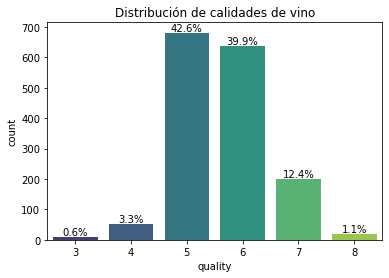

In [75]:
#distribuciones de los distintas calidades de vino sin categorizar

ax = sns.countplot(df['quality'],palette="viridis")
plt.title('Distribución de calidades de vino')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [79]:
#Informacion del documento CSV

df.info()

# Hacemos una lista con las columnas 

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
#Distintos datos del CSV de la libreria describe, estadísticas generales.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

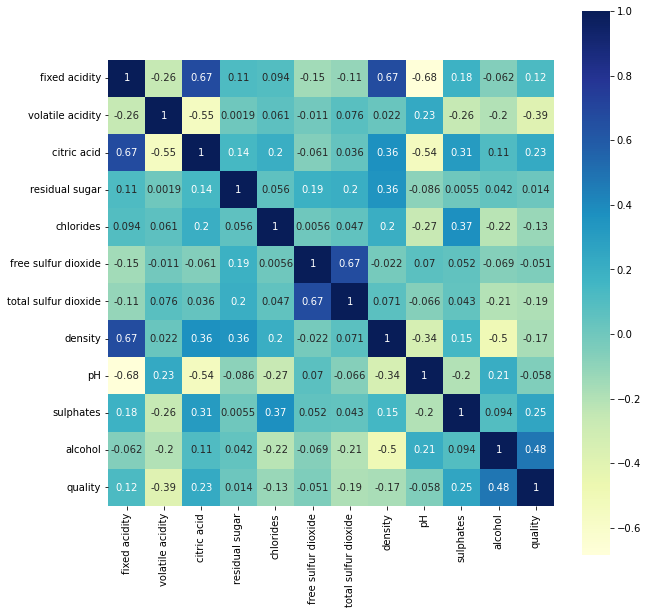

In [49]:
mean_correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(mean_correlation,vmax=1,square=True,annot=True,cmap='YlGnBu')

In [50]:
bins = [0, 4, 5, 6, 10]
labels = ['malo', 'normal', 'bueno', 'muy bueno']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bueno
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal


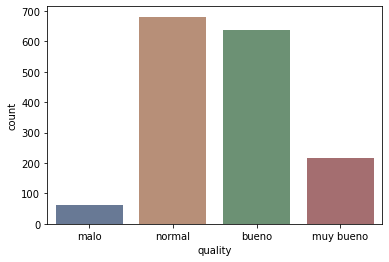

In [51]:
sns.countplot(df['quality'])
plt.show()

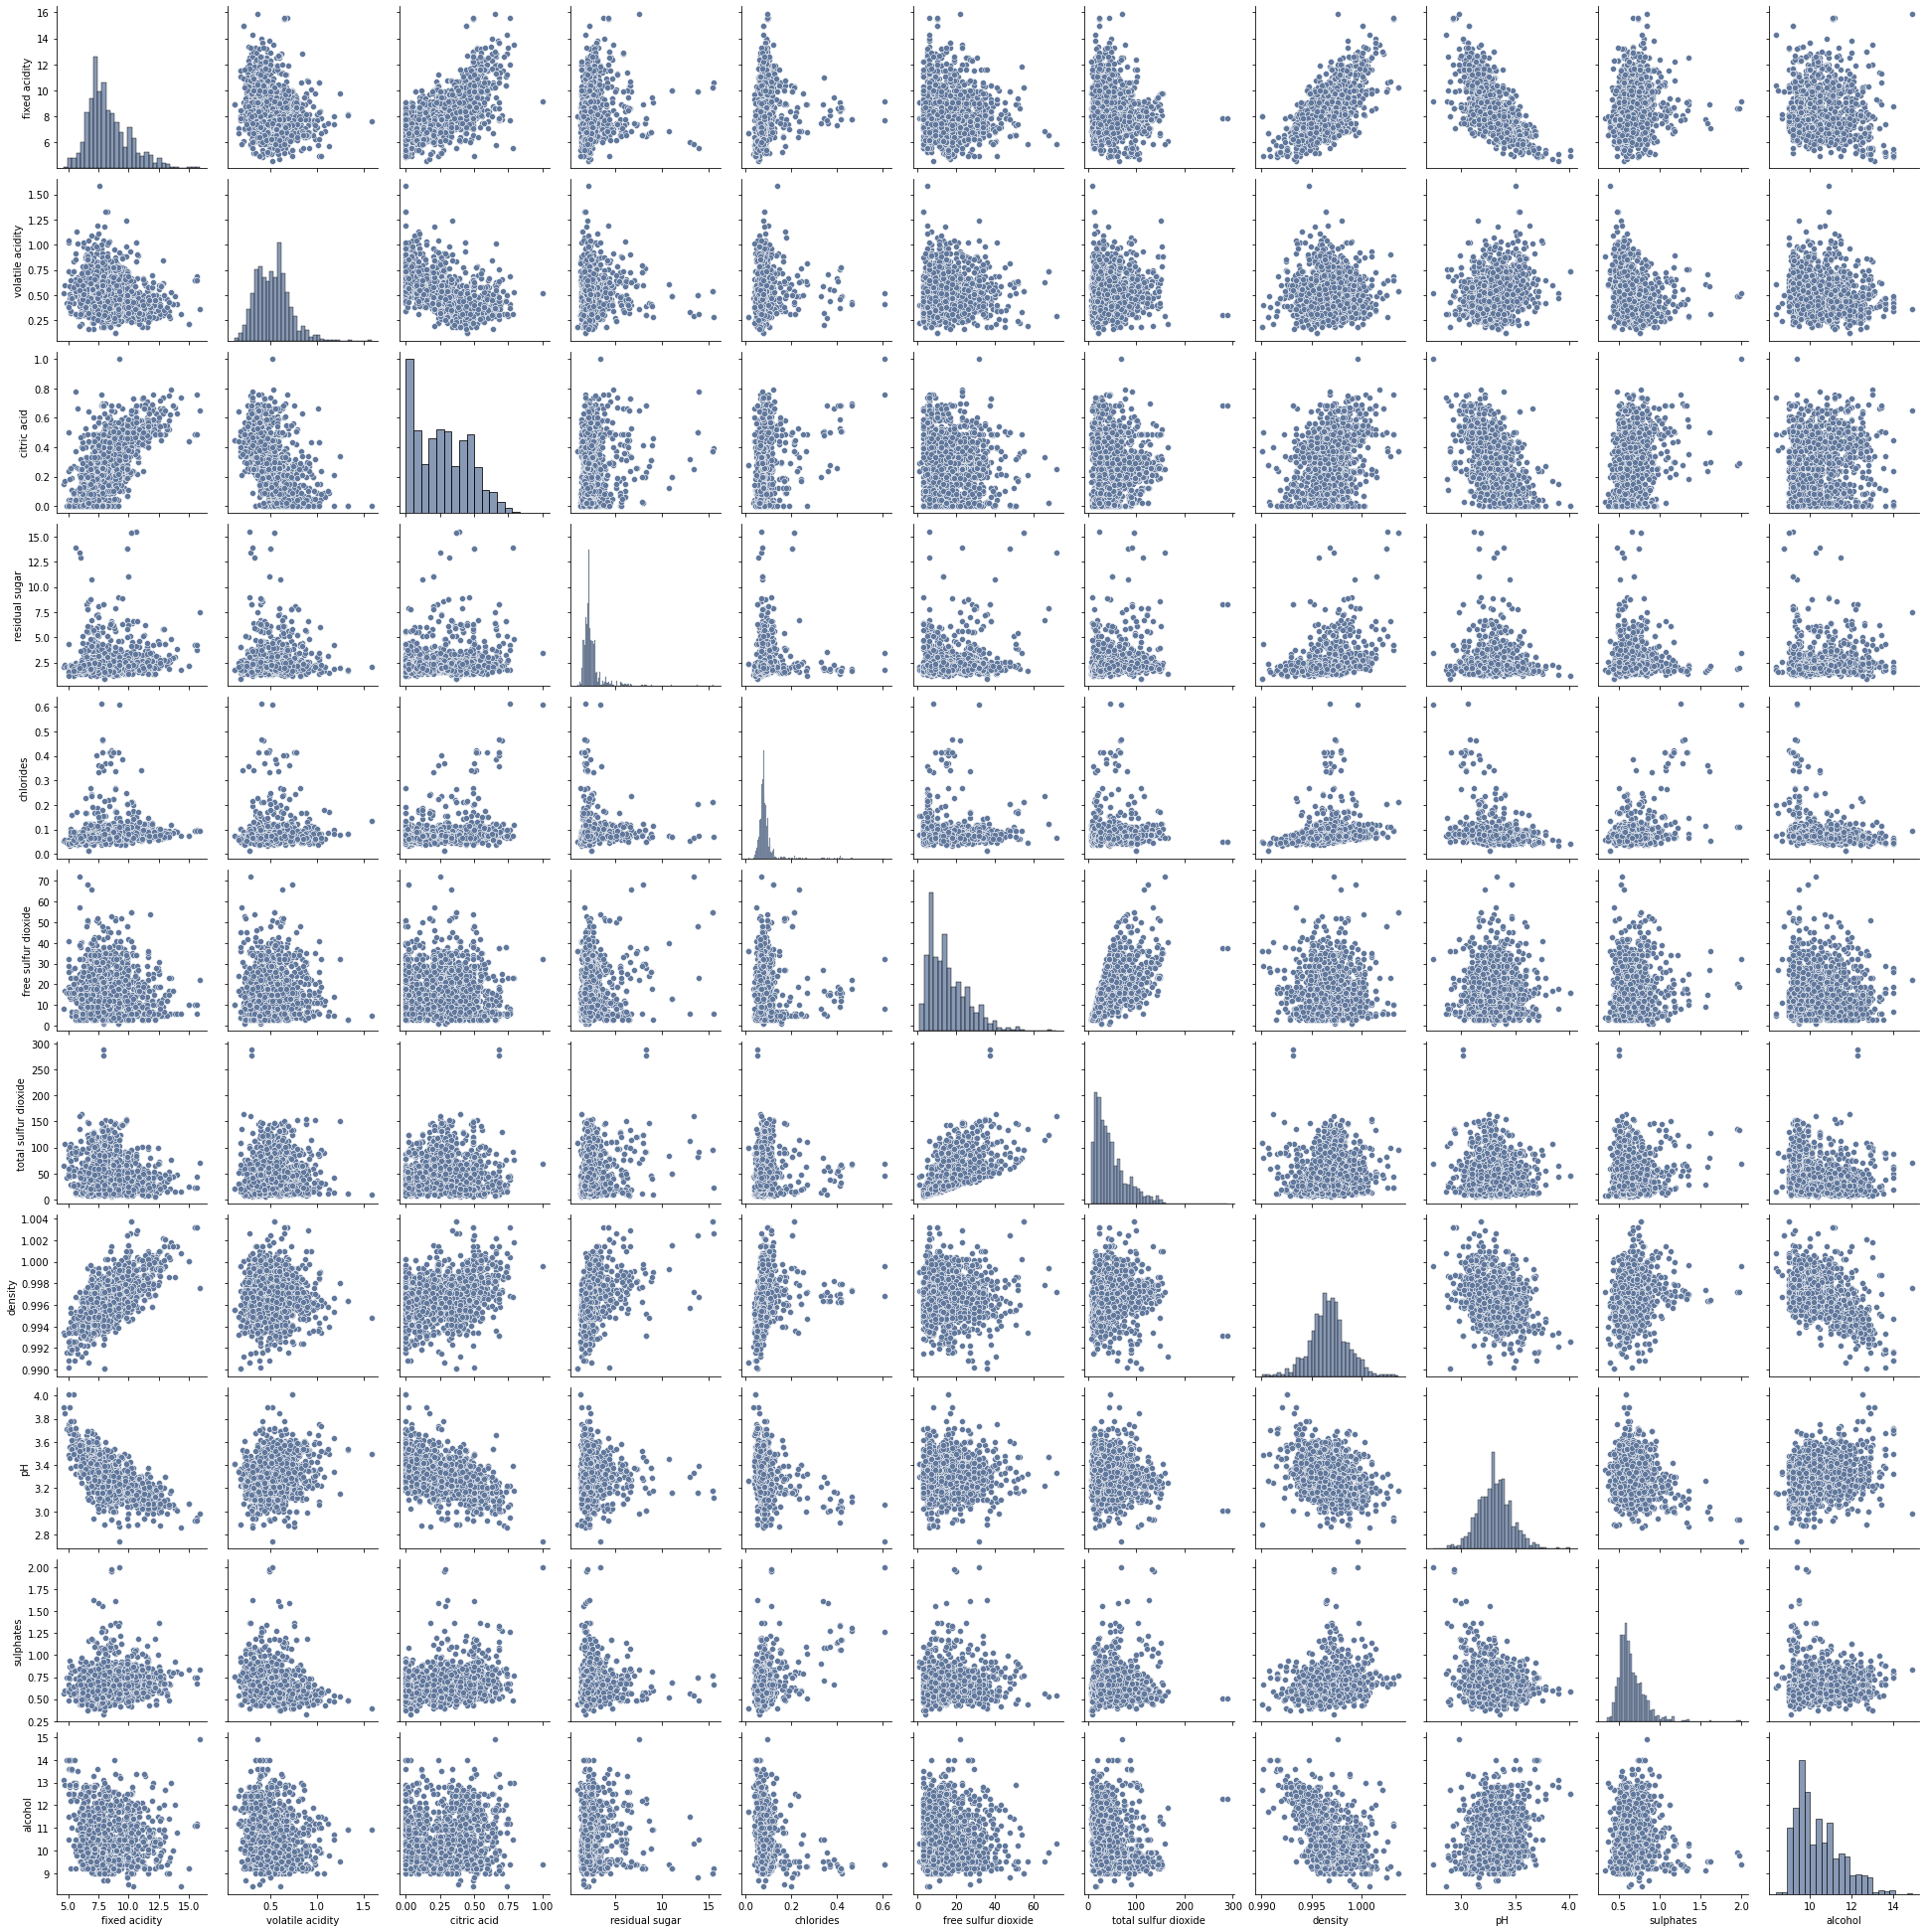

In [59]:
sns.pairplot(df, hue=None)
plt.show()

In [90]:
#Creando conjunto de prueba y entrenamiento.
y = df['quality']
X = df.drop('quality', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.33)

In [94]:
#Probando los modelos predictivos
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_valid)
confusion_matrix(y_valid, random_forest_pred)
accuracy_score(y_valid, random_forest_pred)

random_forest_report = classification_report(y_valid, random_forest_pred, output_dict=True)

df_rf_report = pd.DataFrame(random_forest_report).transpose()
df_rf_report

,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,3.000000
4,0.000000,0.000000,0.000000,17.000000
5,0.724696,0.813636,0.766595,220.000000
6,0.679825,0.711009,0.695067,218.000000
7,0.720000,0.537313,0.615385,67.000000
8,0.333333,0.333333,0.333333,3.000000
accuracy,0.702652,0.702652,0.702652,0.702652
macro avg,0.409642,0.399215,0.401730,528.000000
weighted avg,0.675900,0.702652,0.686376,528.000000


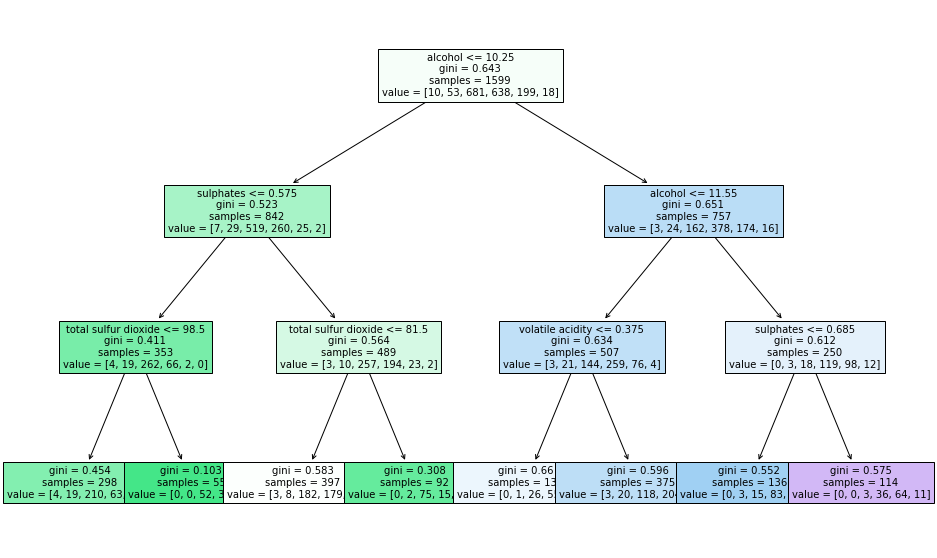

In [103]:
#arbol de decision
#variables
explicativas = df.drop(columns='quality')
objetivo = df.quality

#entrenar modelo
model = DecisionTreeClassifier(max_depth=3)
model.fit(X=explicativas, y=objetivo)

#visualizando el modelo
plt.figure(figsize=(16,10))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, fontsize=10);


In [107]:
#probando el modelo de arbol de decision
example = explicativas.sample()
test = model.predict_proba(example)